# Deliverable 3

# Questions to Answer:

## 1. How white turnout attrition since 2015 in vote total -Flaherty
## 2. Michelle Wu how has her performance changed over time
## 3. Add a subsection to your analysis which breaks down your findings for District 3 (Wards 13, 15, 16)

In [121]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# processing data
def read_data(filename, wp):
    df = pd.read_csv(filename)
    df[wp] = df[wp].astype('Int64')
    #df['wp_string'] = df[wp].apply(lambda x: str(x).zfill(4))
    return df

df_2011 = read_data("2011_CityCouncil_Results_Race_Turnout.csv", "WP")
df_2013 = read_data("2013_CityCouncil_Race_Turnout_Results.csv", "WP")
df_2015 = read_data("2015_city_council.csv","WP").drop([253])
df_2017 = read_data("2017_CityCouncil_AtLarge_Turnout_Race.csv", "Ward_Precinct").drop([253])
df_2019 = read_data("2019 CC Race Turnout.csv","Precinct_y")

In [122]:
df_2015['MICHAEL F FLAHERTY'] = df_2015['MICHAEL F FLAHERTY']/df_2015['VOTES CAST']
df_2017['MICHAEL F FLAHERTY'] = df_2017['MICHAEL F FLAHERTY']/df_2017['VOTES CAST']
df_2019['Flaherty'] = df_2019['Flaherty']/df_2019['Total Votes Cast']

In [123]:
print(df_2015['MICHAEL F FLAHERTY'])

0      0.204593
1      0.265060
2      0.206566
3      0.275000
4      0.205240
         ...   
248    0.163009
249    0.156000
250    0.205703
251    0.197492
252    0.217391
Name: MICHAEL F FLAHERTY, Length: 253, dtype: float64


In [124]:
# 1. How white turnout attrition since 2015 in vote total - MICHAEL F FLAHERTY

#ward_precinct and white(alone)
#df_f = df_2015[['wp_string','WP','White Percentage' ,'MICHAEL F FLAHERTY']]
df_f = df_2015[['WP','White Percentage' ,'MICHAEL F FLAHERTY']]
df_f = df_f.rename(columns= {"WP":"Precinct"})
df_f = df_f.rename(columns= {"MICHAEL F FLAHERTY":"Flaherty_2015"})
df_f = df_f.join(df_2017[["MICHAEL F FLAHERTY"]])
df_f = df_f.rename(columns= {"MICHAEL F FLAHERTY":"Flaherty_2017"})
df_f = df_f.join(df_2019[["Flaherty"]])
df_f = df_f.rename(columns= {"Flaherty":"Flaherty_2019"})
#df_f['Diff_15_17'] = round((df_f['Flaherty_2017'] - df_f['Flaherty_2015'])/df_f['Flaherty_2015'], 3)
#df_f['Diff_17_19'] = round((df_f['Flaherty_2019'] - df_f['Flaherty_2017'])/df_f['Flaherty_2017'], 3)
#df_f['Diff_15_19'] = round((df_f['Flaherty_2019'] - df_f['Flaherty_2015'])/df_f['Flaherty_2015'], 3)
#df_f['Diff_Ave'] = round((abs(df_f['Diff_15_17']) + abs(df_f['Diff_17_19']))/2, 3)

In [125]:
df_f['Diff_15_17'] = round((df_f['Flaherty_2017'] - df_f['Flaherty_2015']), 3)
df_f['Diff_17_19'] = round((df_f['Flaherty_2019'] - df_f['Flaherty_2017']), 3)
df_f['Diff_15_19'] = round((df_f['Flaherty_2019'] - df_f['Flaherty_2015']), 3)
df_f['Diff_Ave'] = round((abs(df_f['Diff_15_17']) + abs(df_f['Diff_17_19']))/2, 3)

In [126]:
print("Average Share of voters Change from 2015 to 2017:",df_f['Diff_15_17'].mean())
print("Average Share of voters Change from 2017 to 2019:",df_f['Diff_17_19'].mean())
print("Average Share of voters Change from 2015 to 2019:",df_f['Diff_15_19'].mean())

Average Share of voters Change from 2015 to 2017: -0.009761904761904765
Average Share of voters Change from 2017 to 2019: -0.02182142857142858
Average Share of voters Change from 2015 to 2019: -0.03157142857142857


In [127]:
top_white_fla = df_f.sort_values(by = ["White Percentage"],ascending = False)

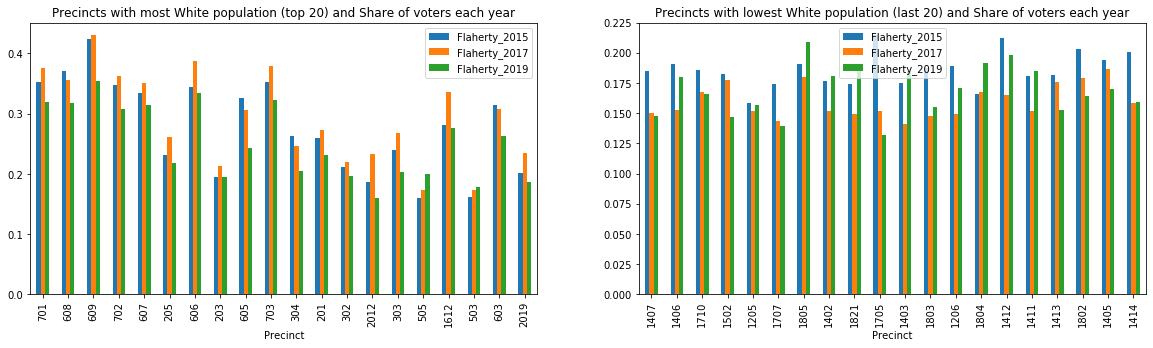

In [128]:
fig, ax = plt.subplots(ncols=2,figsize = (20,5))
top_white_fla[:20].plot(x = "Precinct", y = ['Flaherty_2015','Flaherty_2017','Flaherty_2019'], kind = 'bar', title = "Precincts with most White population (top 20) and Share of voters each year",ax=ax[0])
top_white_fla[-20:].plot(x = "Precinct", y = ['Flaherty_2015','Flaherty_2017','Flaherty_2019'], kind = 'bar',title = "Precincts with lowest White population (last 20) and Share of voters each year",ax=ax[1])

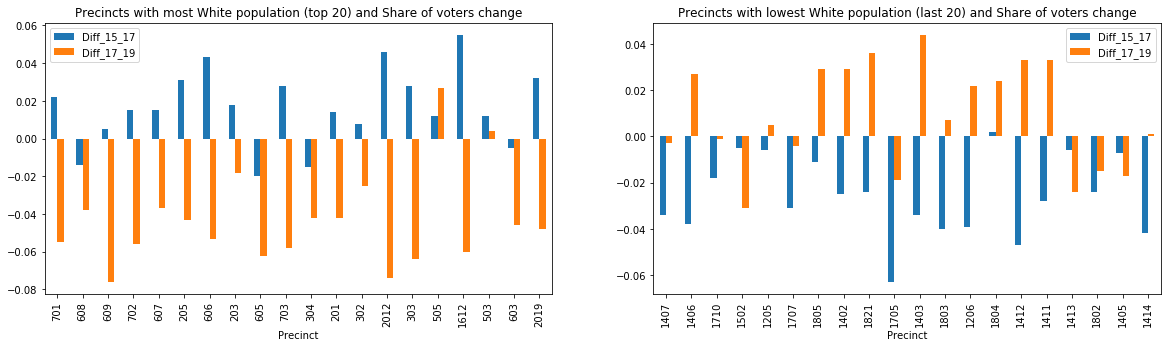

In [129]:
fig, ax = plt.subplots(ncols=2,figsize = (20,5))
top_white_fla[:20].plot(x = "Precinct", y = ['Diff_15_17','Diff_17_19'], kind = 'bar', title = "Precincts with most White population (top 20) and Share of voters change", ax = ax[0])
top_white_fla[-20:].plot(x = "Precinct", y = ['Diff_15_17','Diff_17_19'], kind = 'bar', title = "Precincts with lowest White population (last 20) and Share of voters change", ax = ax[1])




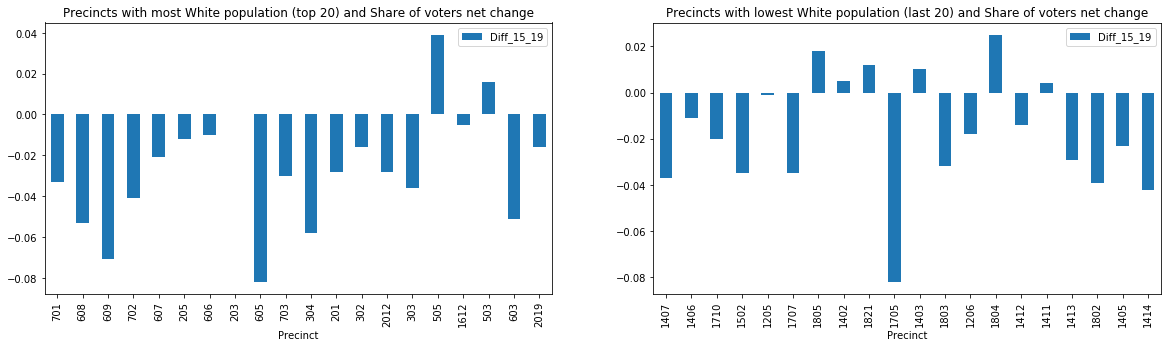

In [130]:
fig, ax = plt.subplots(ncols=2,figsize = (20,5))
top_white_fla[:20].plot(x = "Precinct", y = ['Diff_15_19'], kind = 'bar', title = "Precincts with most White population (top 20) and Share of voters net change", ax = ax[0])

top_white_fla[-20:].plot(x = "Precinct", y = ['Diff_15_19'], kind = 'bar', title = "Precincts with lowest White population (last 20) and Share of voters net change", ax = ax[1])


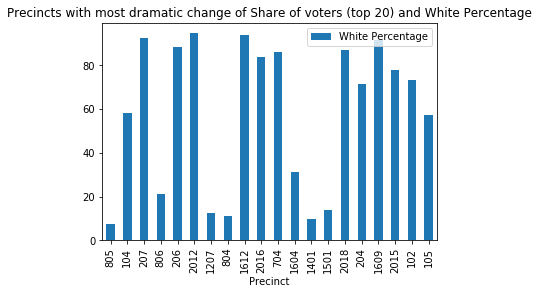

In [131]:
top_change_fla = df_f.sort_values(by = ["Diff_Ave"],ascending = False)
top_change_fla[:20].plot(x = "Precinct", y = ['White Percentage'], kind = 'bar', title = "Precincts with most dramatic change of Share of voters (top 20) and White Percentage")
# >0.048

In [132]:
df_2013['MICHELLE WU'] = df_2013['MICHELLE WU']/df_2013['VOTES CAST']
df_2015['MICHELLE WU'] = df_2015['MICHELLE WU']/df_2015['VOTES CAST']
df_2017['MICHELLE WU'] = df_2017['MICHELLE WU']/df_2017['VOTES CAST']
df_2019['Wu'] = df_2019['Wu']/df_2019['Total Votes Cast']

In [133]:
# 2. Michelle Wu how has her performance changed over time

# She started to run the city council starting from 2013

def turnout_change_race():
    #df_f = df_2013[['wp_string','WP','Black Percentage', 'Hispanic Percentage', 'Asian Percentage' , 'White Percentage','MICHELLE WU']]
    df_f = df_2013[['WP','Black Percentage', 'Hispanic Percentage', 'Asian Percentage' , 'White Percentage','MICHELLE WU']]
    df_f = df_f.rename(columns= {"MICHELLE WU":"WU_2013"})
    df_f = df_f.rename(columns= {"WP":"Precinct"})
    
    df_f = df_f.join(df_2015[["MICHELLE WU"]])
    df_f = df_f.rename(columns= {"MICHELLE WU":"WU_2015"})
    
    df_f = df_f.join(df_2017[["MICHELLE WU"]])
    df_f = df_f.rename(columns= {"MICHELLE WU":"WU_2017"})
    
    df_f = df_f.join(df_2019[["Wu"]])
    df_f = df_f.rename(columns= {"Wu":"WU_2019"})
    return df_f


df_wu = turnout_change_race()

df_wu['Diff_13_15'] = round((df_wu['WU_2015'] - df_wu['WU_2013']), 3)
df_wu['Diff_15_17'] = round((df_wu['WU_2017'] - df_wu['WU_2015']), 3)
df_wu['Diff_17_19'] = round((df_wu['WU_2019'] - df_wu['WU_2017']), 3)
df_wu['Diff_Ave'] = round((abs(df_wu['Diff_13_15']) + abs(df_wu['Diff_15_17'])+ abs(df_wu['Diff_17_19']))/3, 3)

df_wu['Diff_net_13_19'] = round((df_wu['WU_2019'] - df_wu['WU_2013']), 3)

In [134]:
print("Average Turnout Change from 2013 to 2015:",df_wu['Diff_13_15'].mean())
print("Average Turnout Change from 2015 to 2017:",df_wu['Diff_15_17'].mean())
print("Average Turnout Change from 2017 to 2019:",df_wu['Diff_17_19'].mean())
#print("Average Turnout Change from 2015 to 2017:",df_wu['Diff_Ave'].mean())

print("Average Turnout Change from 2013 to 2019:",df_wu['Diff_net_13_19'].mean())

Average Turnout Change from 2013 to 2015: 0.03730830039525692
Average Turnout Change from 2015 to 2017: 0.017567460317460298
Average Turnout Change from 2017 to 2019: -0.035019841269841284
Average Turnout Change from 2013 to 2019: 0.02062698412698412


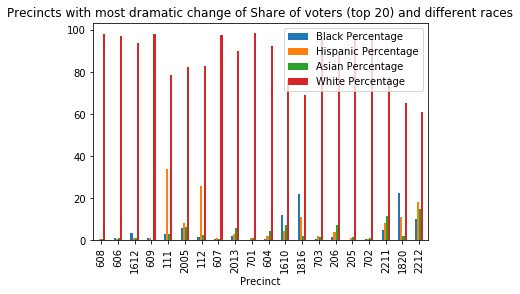

In [135]:
top_change_wu = df_wu.sort_values(by = ["Diff_Ave"],ascending = False)
top_change_wu[:20].plot(x = "Precinct", y = ['Black Percentage', 'Hispanic Percentage', 'Asian Percentage','White Percentage'], kind = 'bar', title = "Precincts with most dramatic change of Share of voters (top 20) and different races")
# >=0.063

In [136]:
top_white_wu = df_wu.sort_values(by = ["White Percentage"],ascending = False)
top_black_wu = df_wu.sort_values(by = ["Black Percentage"],ascending = False)
top_his_wu = df_wu.sort_values(by = ['Hispanic Percentage'],ascending = False)
top_asian_wu = df_wu.sort_values(by = ['Asian Percentage'],ascending = False)

# visualizing least 20 (white)
#top_white_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with lowest White population (last 20) and Turnout")
#top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest White population (last 20) and Turnout change ratio")
#top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest White population (last 20) and Turnout net change ratio")

# visualizing least 20 (black)
#top_black_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',title = "Precincts with lowest Black population (last 20) and Turnout")
#top_black_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5],title = "Precincts with lowest Black population (last 20) and Turnout change ratio")
#top_black_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest Black population (last 20) and Turnout net change ratio")

# visualizing least 20 (Hispanic or Latino)
#top_his_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',title = "Precincts with lowest Hispanic population (last 20) and turnout")
#top_his_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest Hispanic population (last 20) and turnout change ratio")
#top_his_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest Hispanic population (last 20) and Turnout net change ratio")

# visualizing least 20 (Asian)
#top_asian_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',title = "Precincts with lowest Asian population (last 20) and turnout")
#top_asian_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest Asian population (last 20) and Turnout change ratio")
#top_asian_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest Asian population (last 20) and Turnout net change ratio")



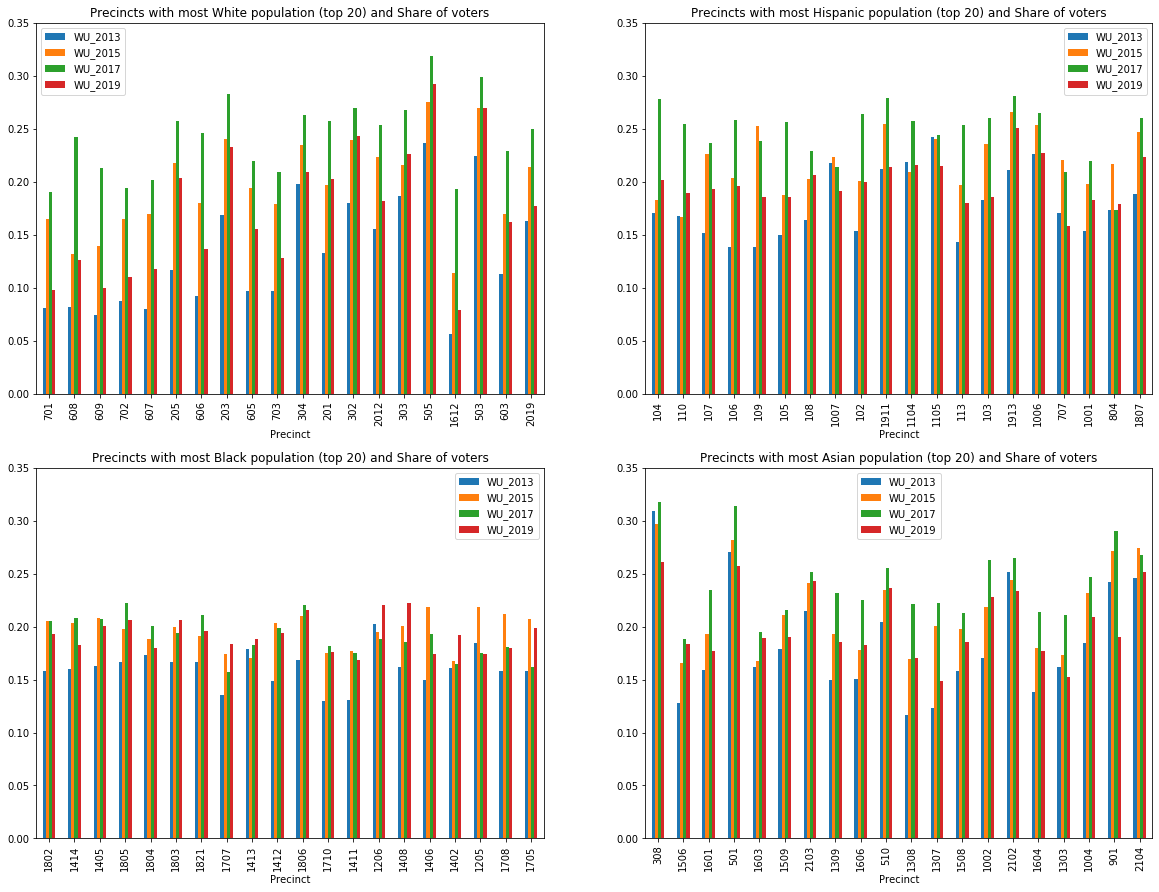

In [137]:
fig, ax = plt.subplots(nrows = 2,ncols=2,figsize = (20,15))
top_white_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',yticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35], title = "Precincts with most White population (top 20) and Share of voters", ax = ax[0,0])
top_black_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',yticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35], title = "Precincts with most Black population (top 20) and Share of voters",ax = ax[1,0])
top_his_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', yticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35],title = "Precincts with most Hispanic population (top 20) and Share of voters",ax = ax[0,1])
top_asian_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', yticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35],title = "Precincts with most Asian population (top 20) and Share of voters",ax =ax[1,1])

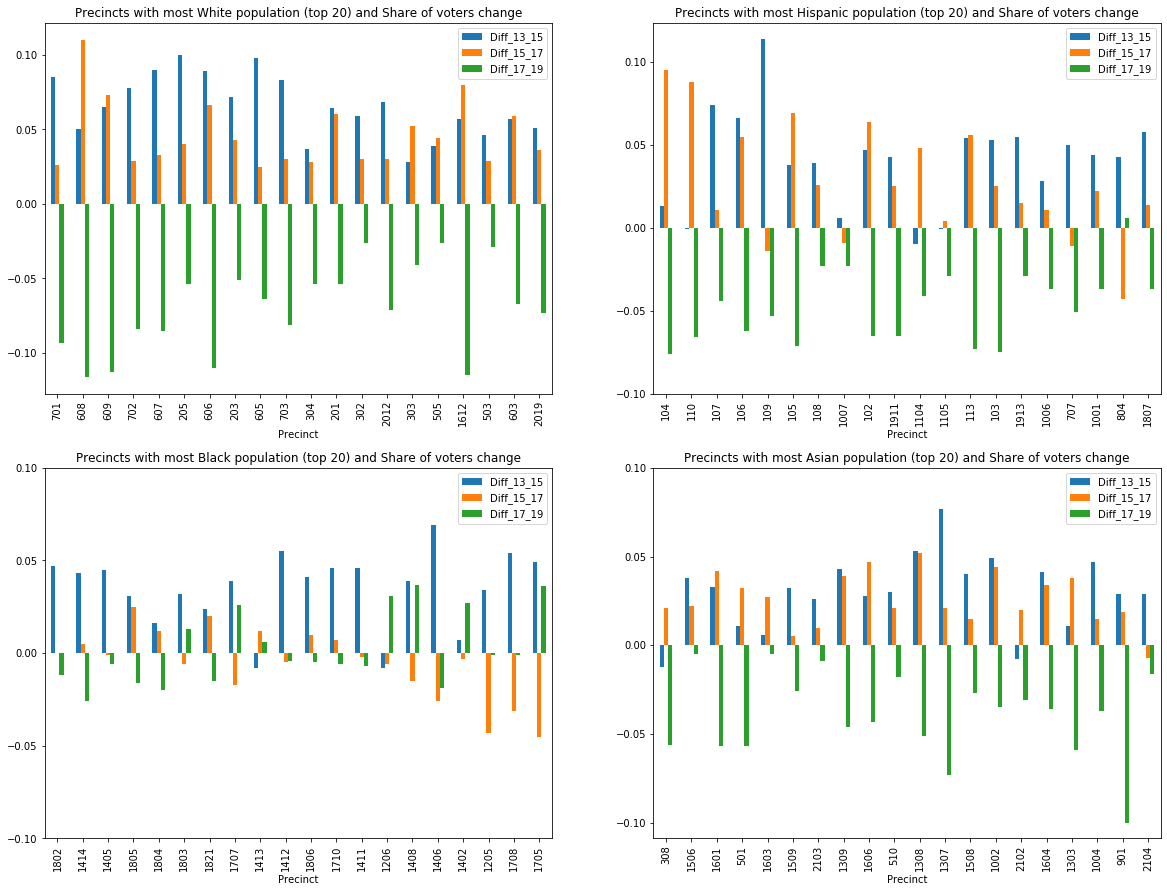

In [138]:
fig, ax = plt.subplots(nrows = 2,ncols=2,figsize = (20,15))
top_white_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-0.1,-0.05,0,0.05,0.1],title = "Precincts with most White population (top 20) and Share of voters change", ax = ax[0,0])
top_black_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-0.1,-0.05,0,0.05,0.1], title = "Precincts with most Black population (top 20) and Share of voters change", ax =ax[1,0])
top_his_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-0.1,-0.05,0,0.05,0.1],title = "Precincts with most Hispanic population (top 20) and Share of voters change" , ax =ax[0,1])
top_asian_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-0.1,-0.05,0,0.05,0.1],title = "Precincts with most Asian population (top 20) and Share of voters change", ax =ax[1,1])


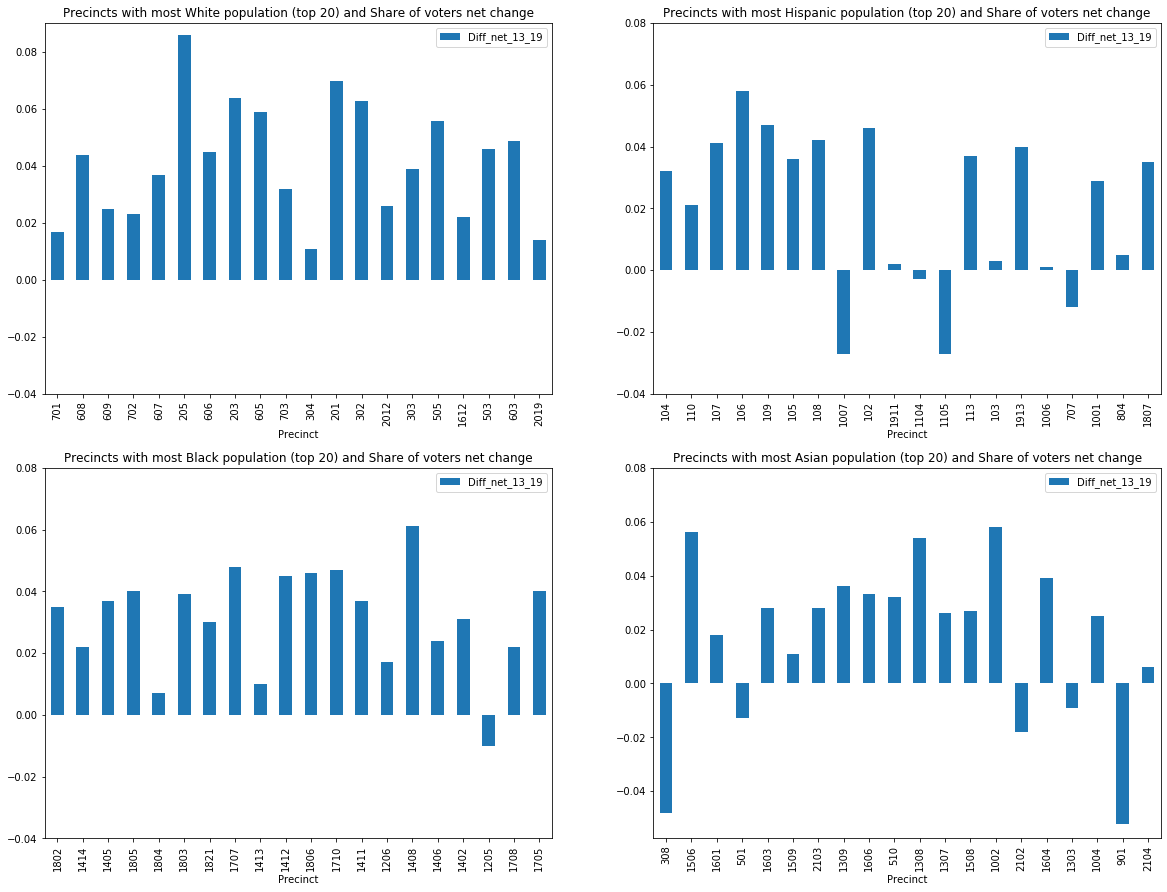

In [139]:
fig, ax = plt.subplots(nrows = 2,ncols=2,figsize = (20,15))
top_white_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-0.04,-0.02,0,0.02,0.04,0.06,0.08],title = "Precincts with most White population (top 20) and Share of voters net change", ax = ax[0,0])

top_black_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-0.04,-0.02,0,0.02,0.04,0.06,0.08],title = "Precincts with most Black population (top 20) and Share of voters net change", ax =ax[1,0])

top_his_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-0.04,-0.02,0,0.02,0.04,0.06,0.08],title = "Precincts with most Hispanic population (top 20) and Share of voters net change",ax =ax[0,1])

top_asian_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-0.04,-0.02,0,0.02,0.04,0.06,0.08],title = "Precincts with most Asian population (top 20) and Share of voters net change", ax =ax[1,1])



In [140]:
# 3. Add a subsection to your analysis which breaks down your findings for District 3 (Wards 13, 15, 16)
def Dorcester_precincts(df):
    columns = df.columns.to_list()
    index = columns.index("Precinct")
    
    data_array = df.to_numpy()
    
    rows = []
    for i in range(np.shape(data_array)[0]):
        current_p = str(int(data_array[i, index]))
        if len(current_p) == 4:
            if current_p[0:2] == '13' or current_p[0:2] == '15' or current_p[0:2] == '16' or current_p[0:2] == '17':
                rows.append(data_array[i].tolist())
    
    Dorcester_df = pd.DataFrame(np.asarray(rows), columns = df.columns)
    Dorcester_df["Precinct"] = Dorcester_df["Precinct"].astype('Int64')
    return Dorcester_df

d_df_wu = Dorcester_precincts(df_wu)
d_df_f = Dorcester_precincts(df_f)

In [141]:
print(d_df_f.head())

   Precinct  White Percentage  Flaherty_2015  Flaherty_2017  Flaherty_2019  \
0      1301          8.518754       0.196242       0.130653       0.157143   
1      1302         12.184250       0.181818       0.139932       0.165000   
2      1303         47.758347       0.221453       0.215139       0.167959   
3      1304         14.908803       0.161049       0.135185       0.159794   
4      1305         24.704142       0.180617       0.152482       0.141753   

   Diff_15_17  Diff_17_19  Diff_15_19  Diff_Ave  
0      -0.066       0.026      -0.039     0.046  
1      -0.042       0.025      -0.017     0.034  
2      -0.006      -0.047      -0.053     0.026  
3      -0.026       0.025      -0.001     0.026  
4      -0.028      -0.011      -0.039     0.020  


In [142]:
print("Average Turnout Change from 2015 to 2017:", d_df_f['Diff_15_17'].mean())
print("Average Turnout Change from 2017 to 2019:", d_df_f['Diff_17_19'].mean())

print("Average Turnout Change from 2015 to 2019:", d_df_f['Diff_15_19'].mean())

Average Turnout Change from 2015 to 2017: -0.020622222222222226
Average Turnout Change from 2017 to 2019: -0.017911111111111117
Average Turnout Change from 2015 to 2019: -0.03855555555555554


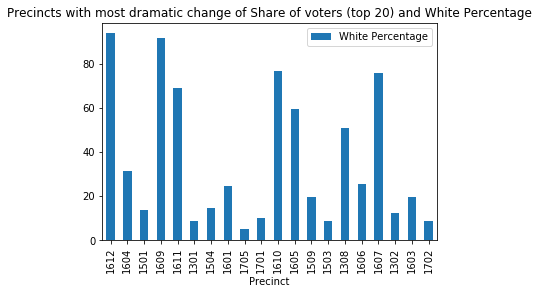

In [143]:
d_top_change_fla = d_df_f.sort_values(by = ["Diff_Ave"],ascending = False)
d_top_change_fla[:20].plot(x = "Precinct", y = ['White Percentage'], kind = 'bar', title = "Precincts with most dramatic change of Share of voters (top 20) and White Percentage")


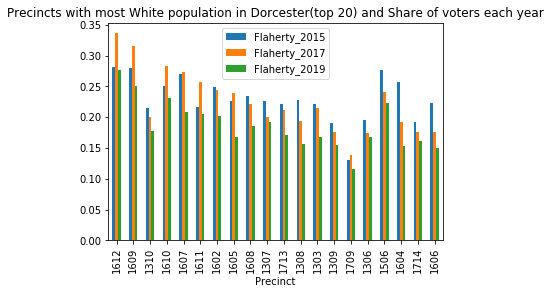

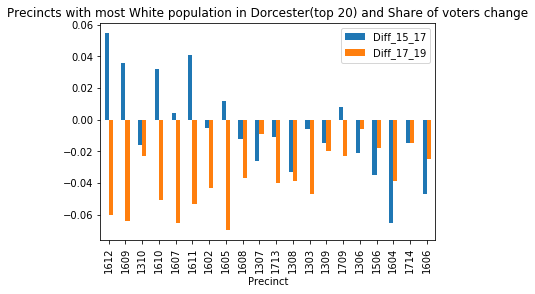

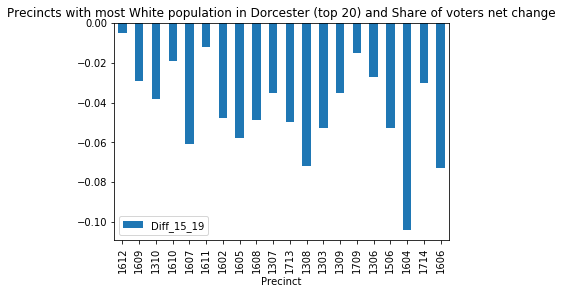

In [144]:
d_top_white_fla = d_df_f.sort_values(by = ["White Percentage"],ascending = False)
# visualizing top 20
d_top_white_fla[:20].plot(x = "Precinct", y = ['Flaherty_2015','Flaherty_2017','Flaherty_2019'], kind = 'bar', title = "Precincts with most White population in Dorcester(top 20) and Share of voters each year")
d_top_white_fla[:20].plot(x = "Precinct", y = ['Diff_15_17','Diff_17_19'], kind = 'bar', title = "Precincts with most White population in Dorcester(top 20) and Share of voters change")
d_top_white_fla[:20].plot(x = "Precinct", y = ['Diff_15_19'], kind = 'bar', title = "Precincts with most White population in Dorcester (top 20) and Share of voters net change")

# visualizing least 20 (white)
#d_top_white_wu[-20:].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', title = "Precincts with lowest White population in Dorcester (last 20) and Turnout")
#d_top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1,2,3,4,5], title = "Precincts with lowest White population in Dorcester (last 20) and Turnout change ratio")
#d_top_white_wu[-20:].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-1,-0.5,0,0.5,1],title = "Precincts with lowest White population in Dorcester (last 20) and Turnout net change ratio")



In [145]:
print("Average Turnout Change from 2013 to 2015:", d_df_wu['Diff_13_15'].mean())
print("Average Turnout Change from 2015 to 2017:", d_df_wu['Diff_15_17'].mean())
print("Average Turnout Change from 2017 to 2019:", d_df_wu['Diff_17_19'].mean())

print("Average Turnout Change from 2013 to 2019:", d_df_wu['Diff_net_13_19'].mean())

Average Turnout Change from 2013 to 2015: 0.03722222222222222
Average Turnout Change from 2015 to 2017: 0.011644444444444442
Average Turnout Change from 2017 to 2019: -0.025355555555555544
Average Turnout Change from 2013 to 2019: 0.023577777777777788


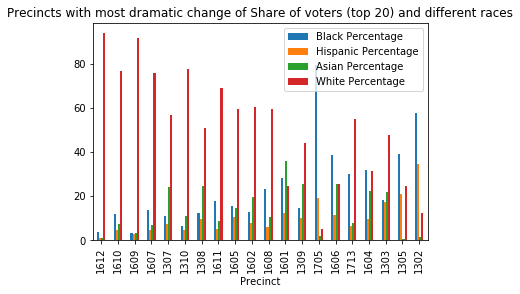

In [146]:
d_top_change_wu = d_df_wu.sort_values(by = ["Diff_Ave"],ascending = False)
d_top_change_wu[:20].plot(x = "Precinct", y = ['Black Percentage', 'Hispanic Percentage', 'Asian Percentage','White Percentage'], kind = 'bar', title = "Precincts with most dramatic change of Share of voters (top 20) and different races")


In [147]:
d_top_white_wu = d_df_wu.sort_values(by = ["White Percentage"],ascending = False)
d_top_black_wu = d_df_wu.sort_values(by = ["Black Percentage"],ascending = False)
d_top_his_wu = d_df_wu.sort_values(by = ['Hispanic Percentage'],ascending = False)
d_top_asian_wu = d_df_wu.sort_values(by = ['Asian Percentage'],ascending = False)

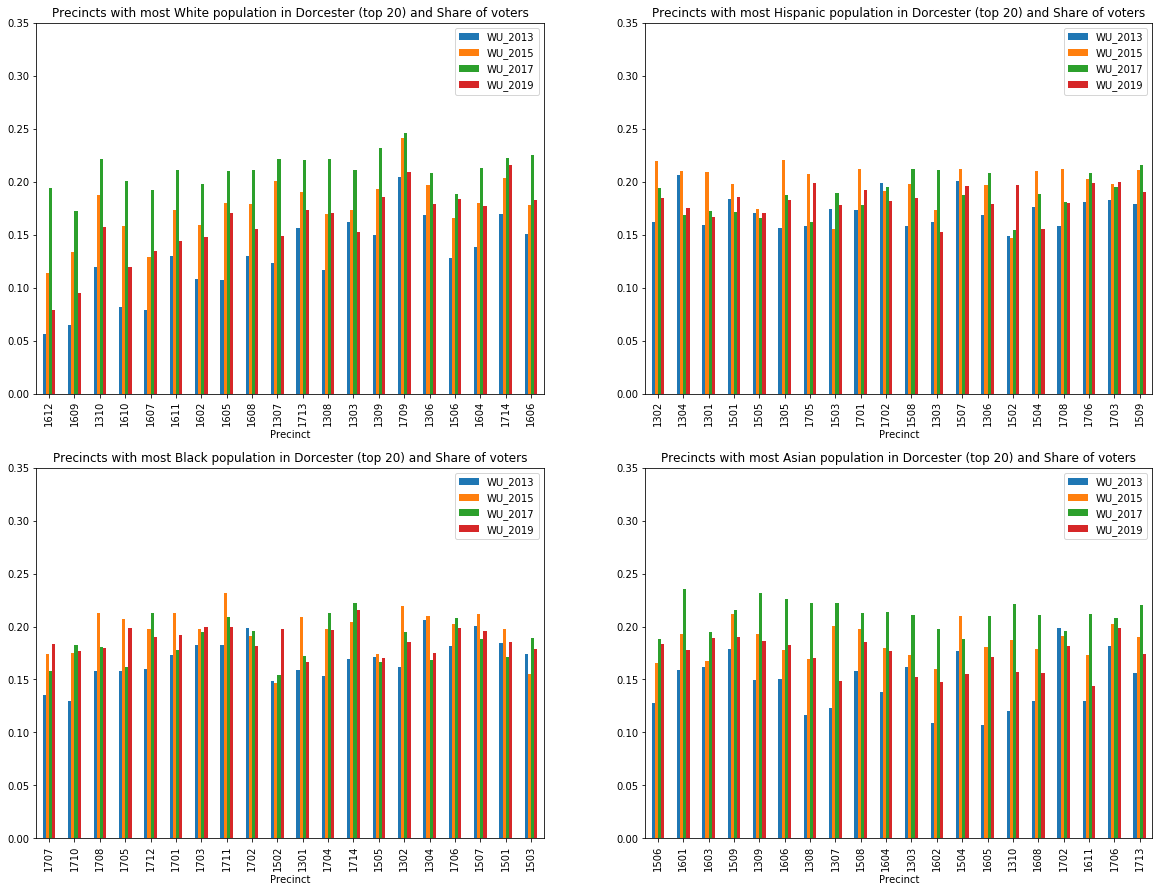

In [148]:
fig, ax = plt.subplots(nrows = 2,ncols=2,figsize = (20,15))
d_top_white_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',yticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35], title = "Precincts with most White population in Dorcester (top 20) and Share of voters", ax = ax[0,0])
d_top_black_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar',yticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35], title = "Precincts with most Black population in Dorcester (top 20) and Share of voters",ax = ax[1,0])
d_top_his_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', yticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35],title = "Precincts with most Hispanic population in Dorcester (top 20) and Share of voters",ax = ax[0,1])
d_top_asian_wu[:20].plot(x = "Precinct", y = ['WU_2013','WU_2015','WU_2017','WU_2019'], kind = 'bar', yticks = [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35],title = "Precincts with most Asian population in Dorcester (top 20) and Share of voters",ax =ax[1,1])

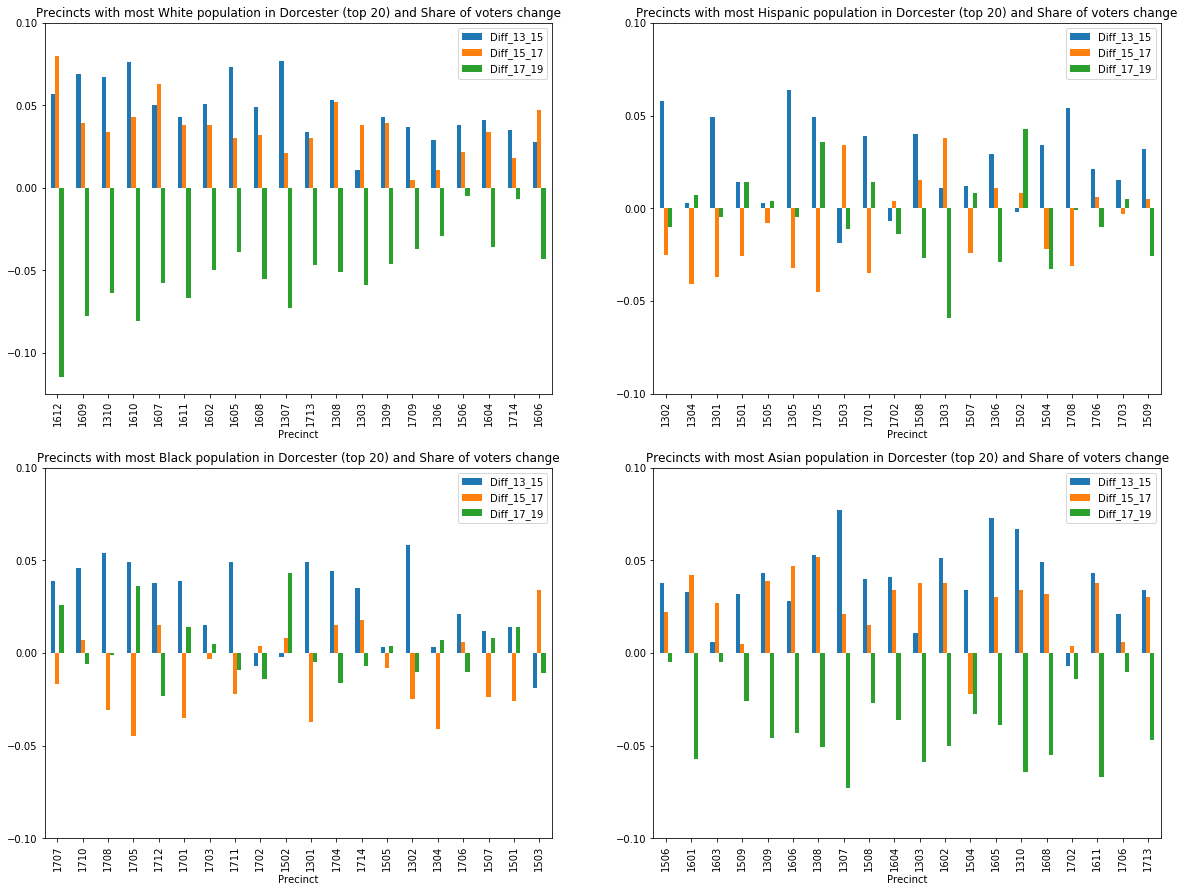

In [149]:
fig, ax = plt.subplots(nrows = 2,ncols=2,figsize = (20,15))
d_top_white_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-0.1,-0.05,0,0.05,0.1],title = "Precincts with most White population in Dorcester (top 20) and Share of voters change", ax = ax[0,0])
d_top_black_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-0.1,-0.05,0,0.05,0.1], title = "Precincts with most Black population in Dorcester (top 20) and Share of voters change", ax =ax[1,0])
d_top_his_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-0.1,-0.05,0,0.05,0.1],title = "Precincts with most Hispanic population in Dorcester (top 20) and Share of voters change" , ax =ax[0,1])
d_top_asian_wu[:20].plot(x = "Precinct", y = ['Diff_13_15','Diff_15_17','Diff_17_19'], kind = 'bar',yticks = [-0.1,-0.05,0,0.05,0.1],title = "Precincts with most Asian population in Dorcester (top 20) and Share of voters change", ax =ax[1,1])


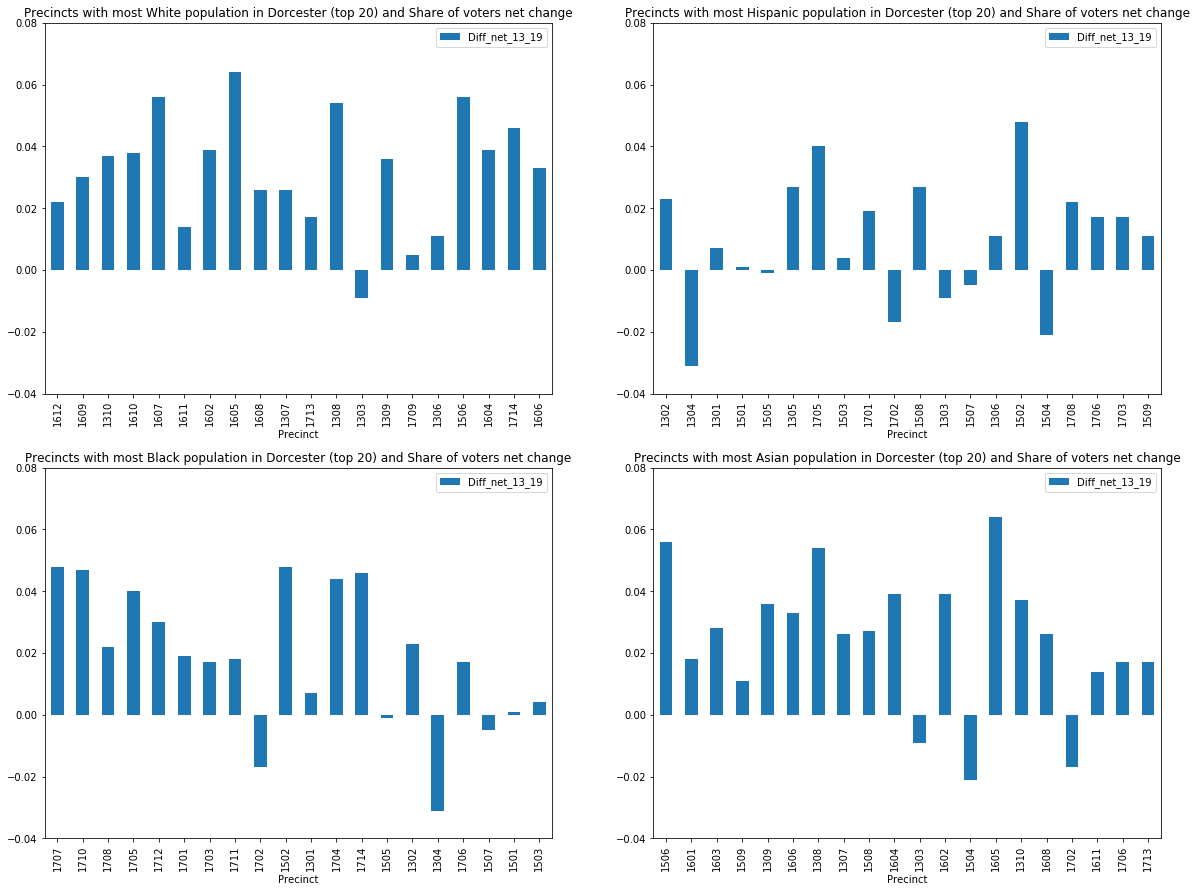

In [150]:
fig, ax = plt.subplots(nrows = 2,ncols=2,figsize = (20,15))
d_top_white_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-0.04,-0.02,0,0.02,0.04,0.06,0.08],title = "Precincts with most White population in Dorcester (top 20) and Share of voters net change", ax = ax[0,0])

d_top_black_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-0.04,-0.02,0,0.02,0.04,0.06,0.08],title = "Precincts with most Black population in Dorcester (top 20) and Share of voters net change", ax =ax[1,0])

d_top_his_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-0.04,-0.02,0,0.02,0.04,0.06,0.08],title = "Precincts with most Hispanic population in Dorcester (top 20) and Share of voters net change",ax =ax[0,1])

d_top_asian_wu[:20].plot(x = "Precinct", y = ['Diff_net_13_19'], kind = 'bar',yticks = [-0.04,-0.02,0,0.02,0.04,0.06,0.08],title = "Precincts with most Asian population in Dorcester (top 20) and Share of voters net change", ax =ax[1,1])



In [151]:
# export all datasets
df_f['wp_string'] = df_f['Precinct'].apply(lambda x: str(x).zfill(4))
df_wu['wp_string'] = df_wu['Precinct'].apply(lambda x: str(x).zfill(4))
df_f.to_csv("fra.csv")
df_wu.to_csv("wu.csv")